**INSY 695: Individual Assignment 1 (An end to end ML Project)**

Student ID: 261098992\
Student Name: Chongho Pyo

<table align="left">
  <td>
    <a href="https://colab.research.google.com/github/ageron/handson-ml3/blob/main/02_end_to_end_machine_learning_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>
  </td>
  <td>
    <a target="_blank" href="https://kaggle.com/kernels/welcome?src=https://github.com/ageron/handson-ml3/blob/main/02_end_to_end_machine_learning_project.ipynb"><img src="https://kaggle.com/static/images/open-in-kaggle.svg" /></a>
  </td>
</table>

This project requires Python 3.7 or above:

In [ ]:
import sys

assert sys.version_info >= (3, 7)

It also requires Scikit-Learn ≥ 1.0.1:

In [ ]:
from packaging import version
import sklearn

assert version.parse(sklearn.__version__) >= version.parse("1.0.1")

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix

from sklearn.ensemble import IsolationForest, GradientBoostingRegressor, RandomForestRegressor

from sklearn.preprocessing import OrdinalEncoder, MinMaxScaler, StandardScaler

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

from sklearn.model_selection import KFold, GridSearchCV, RandomizedSearchCV

from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.neural_network import MLPRegressor
from sklearn.tree import DecisionTreeRegressor

from scipy import stats

import warnings
warnings.filterwarnings("ignore")

![image.png](attachment:image.png)

# Framing the problem

- Use case objective & Future solution applicatility
  - The obective of this analysis is to predict the total revenue generated from a customer. 
  - This can be used to lower the customer churn rate, as well as increase retention rate.
  - In addition, propotion policies can be revised according to the result based on the expected revenue of a specific customer. 

- Current solutions status
  - Predictive modeling techniques: using machine learning algorithms to analyze customer data and make predictions about future revenue
  - RFM analysis: identifying the most valuable customers by analyzing their recency, frequency, and monetary value. 
  - Segmenting customers based on demographics, purchase history, or behavior: allows to target retention efforts towards specific groups of customers.
  - Surveys and feedback: identifying issues that may be causing dissatisfaction and leading to churn.

- Framework
  - The use case can be approached as a supervised machine learning problem. This is because we have labeled data with historical revenue and other customer information.
  - The target variable is the customer revenue (LodgingRevenue and OtherRevenue), and the input variables includes the customer's demographic information, purchase history, and other relevant information.
  - The model will be trained to predict the target variable based on the input variables. The model can be trained and optimized using historical data and then deployed for specific predictions or it can be implemented as a continuous learning process where the model is updated as new data becomes available, depending on the specific needs of the business.

- Performance measurement: metrics below are aligned with the business objective as they measure the accuracy of the model's predictions of customer revenue.
  - Root Mean Squared Error (RMSE): This metric provides an understanding of the average difference between the predicted and actual customer revenue values
  - R-squared (R²): This metric measures the proportion of the variation in the target variable that is explained by the input variables, a high R-squared value indicates that the model is able to explain a large portion of the variation in the target variable.
  - Correlation coefficient: This metric measures the linear relationship between predicted and actual customer revenue values, it ranges from -1 to 1 and a coefficient of 1 indicates a perfect positive correlation between the predicted and actual revenue.
  - Cross-validation: a method of evaluating the performance of a model by dividing the data into training and testing sets, and then training the model on the training set and evaluating its performance on the testing set. This helps to ensure that the model generalizes well to unseen data.

- Minimum performance
  - In general, a lower value for the performance metrics indicates that the model is better at achieving the business objective. 
  - For example, for RMSE metric, a commonly accepted threshold is to aim for a value of less than 20% of the average customer revenue.
  - For R-squared (R²), the threshold is a value greater than 0.8
  - For correlation coefficient, the threshold is a value greater than 0.7
  - By achieving these thresholds, the model will be considered as performing well in terms of predicting customer revenue which aligns with the business objective.

- Comparable problems
  - Sales forecasting: to predict future sales of a product or service. It is similar to the problem of predicting customer revenue as it involves forecasting future revenue.
  - Customer segmentation: to divide customers into groups based on certain characteristics. It is similar to the problem of predicting customer revenue as it also involves understanding customer behavior and identifying patterns in customer data.

- Human expertise
  - Data scientists, statisticians, marketing analysts, and business analysts
  - They are able to develop models for this problem and have knowledge of different techniques and tools that can be used to solve it.
  - They can also provide insight into the specific requirements and characteristics of the problem and help interpret and communicate the results of the model.

# Data Acquisition (Getting the Data)

**My use case is to predict the total revenue that will be generated by a new customer**

- In order to implement the analysis, we need at least customer demographic information, customer revenue data, and historial stay data.
- The amount of data needed depends on the specific requirements of the analysis. However, in general, a large amount of data is needed to train a robust and accurate model. 
- This is because the more data that is available, the better the model will be able to learn from the data, generalize to new data, and make accurate predictions. 
- In addition, the data should be diverse and representative of the target population, and it should also be cleaned, transformed and prepared for analysis.

## Download the Data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df_raw = pd.read_excel("/content/drive/MyDrive/Colab Notebooks/InformationSystem/HotelCustomersDataset.xlsx")

## Take a Quick Look at the Data Structure

In [ ]:
# df_raw: raw data
df_raw.head()

,ID,Nationality,Age,DaysSinceCreation,NameHash,DocIDHash,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,...,SRMediumFloor,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom
0,1,PRT,51.0,150,0x8E0A7AF39B633D5EA25C3B7EF4DFC5464B36DB7AF375...,0x71568459B729F7A7ABBED6C781A84CA4274D571003AC...,45,371.0,105.3,1,...,0,0,0,0,0,0,0,0,0,0
1,2,PRT,NaN,1095,0x21EDE41906B45079E75385B5AA33287CA09DE1AB86DE...,0x5FA1E0098A31497057C5A6B9FE9D49FD6DD47CCE7C26...,61,280.0,53.0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,DEU,31.0,1095,0x31C5E4B74E23231295FDB724AD578C02C4A723F4BA2B...,0xC7CF344F5B03295037595B1337AC905CA188F1B5B3A5...,0,0.0,0.0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,FRA,60.0,1095,0xFF534C83C0EF23D1CE516BC80A65D0197003D27937D4...,0xBD3823A9B4EC35D6CAF4B27AE423A677C0200DB61E82...,93,240.0,60.0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,FRA,51.0,1095,0x9C1DEF02C9BE242842C1C1ABF2C5AA249A1EEB4763B4...,0xE175754CF77247B202DD0820F49407C762C14A603B3A...,0,0.0,0.0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df_raw.dtypes

ID                        int64
Nationality              object
Age                     float64
DaysSinceCreation         int64
NameHash                 object
DocIDHash                object
AverageLeadTime           int64
LodgingRevenue          float64
OtherRevenue            float64
BookingsCanceled          int64
BookingsNoShowed          int64
BookingsCheckedIn         int64
PersonsNights             int64
RoomNights                int64
DaysSinceLastStay         int64
DaysSinceFirstStay        int64
DistributionChannel      object
MarketSegment            object
SRHighFloor               int64
SRLowFloor                int64
SRAccessibleRoom          int64
SRMediumFloor             int64
SRBathtub                 int64
SRShower                  int64
SRCrib                    int64
SRKingSizeBed             int64
SRTwinBed                 int64
SRNearElevator            int64
SRAwayFromElevator        int64
SRNoAlcoholInMiniBar      int64
SRQuietRoom               int64
dtype: o

In [ ]:
# store columns based on data types

id_cols = ['ID', 'NameHash', 'DocIDHash']# identifier variables
dum_cols = ['SRHighFloor', 'SRLowFloor', 'SRAccessibleRoom', 'SRMediumFloor',
       'SRBathtub', 'SRShower', 'SRCrib', 'SRKingSizeBed', 'SRTwinBed',
       'SRNearElevator', 'SRAwayFromElevator', 'SRNoAlcoholInMiniBar',
       'SRQuietRoom']# dummified variables
cate_cols = ['DistributionChannel', 'MarketSegment']# categorical variables
num_cols = ['Age', 'DaysSinceCreation', 'AverageLeadTime', 'LodgingRevenue',
        'BookingsCheckedIn', 'PersonsNights', 'RoomNights', 
        'OtherRevenue', 'BookingsCanceled', 'BookingsNoShowed', 
        'DaysSinceLastStay', 'DaysSinceFirstStay', 'TotalRevenue']

In [ ]:
# Descriptive statistics
df_raw.describe()

,ID,Age,DaysSinceCreation,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,BookingsCheckedIn,PersonsNights,...,SRMediumFloor,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom
count,83590.000000,79811.000000,83590.000000,83590.000000,83590.000000,83590.000000,83590.000000,83590.000000,83590.000000,83590.000000,...,83590.000000,83590.000000,83590.000000,83590.000000,83590.000000,83590.000000,83590.000000,83590.000000,83590.000000,83590.000000
mean,41795.500000,45.398028,453.640902,66.196028,298.802087,67.589132,0.002022,0.000634,0.794617,4.649133,...,0.000873,0.002847,0.001711,0.013219,0.352686,0.142541,0.000335,0.003505,0.000120,0.088372
std,24130.498838,16.572368,313.390291,87.758990,372.851892,114.327776,0.066770,0.029545,0.695778,4.567673,...,0.029539,0.053284,0.041326,0.114213,0.477809,0.349606,0.018299,0.059101,0.010937,0.283837
min,1.000000,-11.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20898.250000,34.000000,177.000000,0.000000,59.000000,2.000000,0.000000,0.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,41795.500000,46.000000,397.000000,29.000000,234.000000,38.500000,0.000000,0.000000,1.000000,4.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,62692.750000,57.000000,723.000000,103.000000,402.000000,87.675000,0.000000,0.000000,1.000000,6.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,83590.000000,122.000000,1095.000000,588.000000,21781.000000,7730.250000,9.000000,3.000000,66.000000,116.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
# Concise summary of df_raw
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83590 entries, 0 to 83589
Data columns (total 31 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ID                    83590 non-null  int64  
 1   Nationality           83590 non-null  object 
 2   Age                   79811 non-null  float64
 3   DaysSinceCreation     83590 non-null  int64  
 4   NameHash              83590 non-null  object 
 5   DocIDHash             83590 non-null  object 
 6   AverageLeadTime       83590 non-null  int64  
 7   LodgingRevenue        83590 non-null  float64
 8   OtherRevenue          83590 non-null  float64
 9   BookingsCanceled      83590 non-null  int64  
 10  BookingsNoShowed      83590 non-null  int64  
 11  BookingsCheckedIn     83590 non-null  int64  
 12  PersonsNights         83590 non-null  int64  
 13  RoomNights            83590 non-null  int64  
 14  DaysSinceLastStay     83590 non-null  int64  
 15  DaysSinceFirstStay 

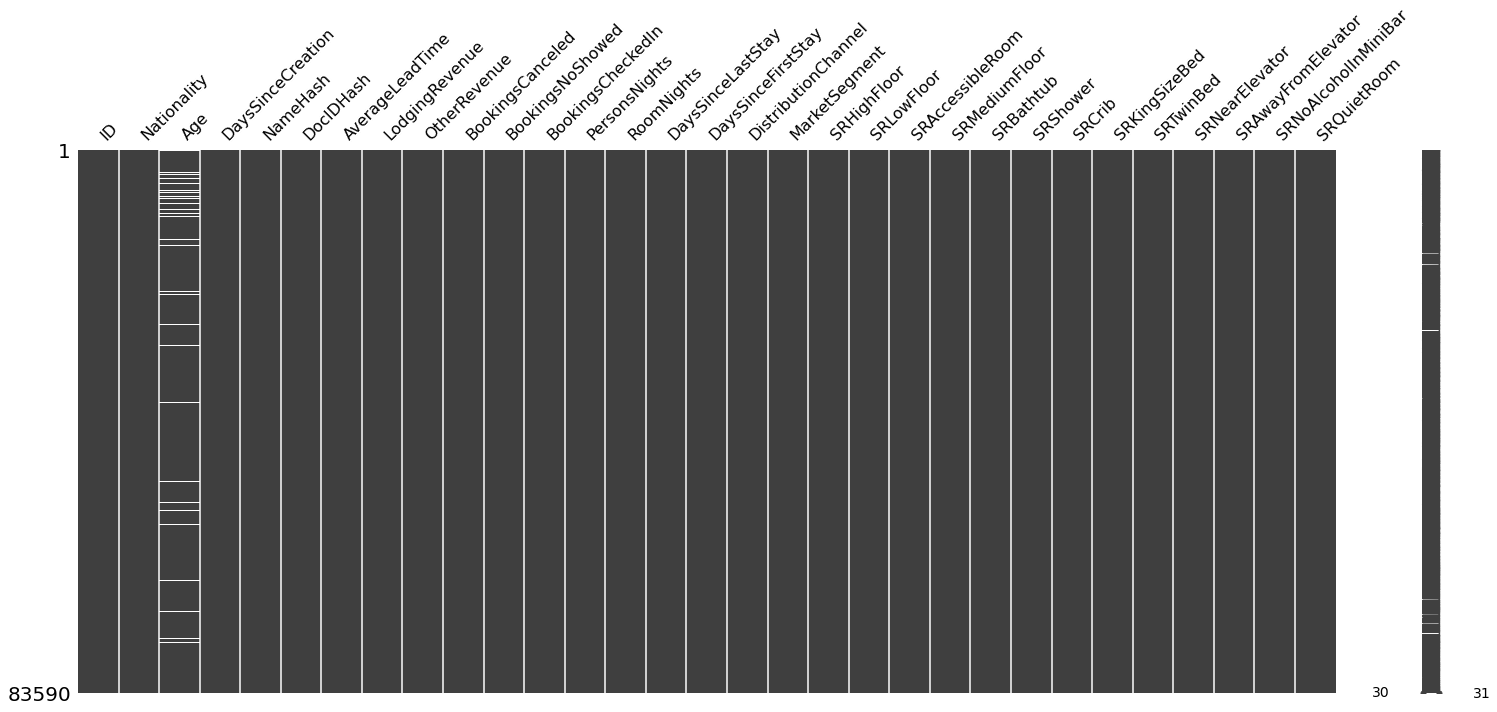

In [ ]:
import missingno as msno

msno.matrix(df_raw)

In [ ]:
# total number of missing values of each column
df_raw.isnull().sum()

ID                         0
Nationality                0
Age                     3779
DaysSinceCreation          0
NameHash                   0
DocIDHash                  0
AverageLeadTime            0
LodgingRevenue             0
OtherRevenue               0
BookingsCanceled           0
BookingsNoShowed           0
BookingsCheckedIn          0
PersonsNights              0
RoomNights                 0
DaysSinceLastStay          0
DaysSinceFirstStay         0
DistributionChannel        0
MarketSegment              0
SRHighFloor                0
SRLowFloor                 0
SRAccessibleRoom           0
SRMediumFloor              0
SRBathtub                  0
SRShower                   0
SRCrib                     0
SRKingSizeBed              0
SRTwinBed                  0
SRNearElevator             0
SRAwayFromElevator         0
SRNoAlcoholInMiniBar       0
SRQuietRoom                0
dtype: int64

In [ ]:
# missing value ratios
df_raw.isnull().sum() / len(df_raw)

ID                      0.000000
Nationality             0.000000
Age                     0.045209
DaysSinceCreation       0.000000
NameHash                0.000000
DocIDHash               0.000000
AverageLeadTime         0.000000
LodgingRevenue          0.000000
OtherRevenue            0.000000
BookingsCanceled        0.000000
BookingsNoShowed        0.000000
BookingsCheckedIn       0.000000
PersonsNights           0.000000
RoomNights              0.000000
DaysSinceLastStay       0.000000
DaysSinceFirstStay      0.000000
DistributionChannel     0.000000
MarketSegment           0.000000
SRHighFloor             0.000000
SRLowFloor              0.000000
SRAccessibleRoom        0.000000
SRMediumFloor           0.000000
SRBathtub               0.000000
SRShower                0.000000
SRCrib                  0.000000
SRKingSizeBed           0.000000
SRTwinBed               0.000000
SRNearElevator          0.000000
SRAwayFromElevator      0.000000
SRNoAlcoholInMiniBar    0.000000
SRQuietRoo

In [ ]:
prop = df_raw['Age'].isna().sum() / len(df_raw)
print("Proportion of missing values in 'Age' column:", round(prop, 3))

Proportion of missing values in 'Age' column: 0.045


# Data Exploration (Discover and Visualize the Data to Gain Insights)

- Now we observe 3779 missing values are in 'Age' column
- Since the proportion of the missing values are negligible (4.5%) and they can result in inaccurate or biased conclusion, we can remove observations with the missing values.

In [ ]:
# df1: DataFrame without missing values
df1 = df_raw.dropna()

print("Total number of observations after dropping missing values:", len(df1))

Total number of observations after dropping missing values: 79811


In [ ]:
# TotalRevenue column is added to be used as a target variable
df1['TotalRevenue'] = df1['LodgingRevenue'] + df1['OtherRevenue']

## Data filtering

- observations with positive age values
- exclude observations with more than 100 ages
- exclude observations with negative AverageLeadTime
- Remove observations which have negative or 0 in 'PersonsNights' column
- Remove observations with 'LodgingRevenue' = 0

In [ ]:
df2 = df1[(df1['Age'] > 0) & (df1['Age'] < 100) & (df1['AverageLeadTime'] > 0) &
         (df1['PersonsNights'] > 0) & (df1['LodgingRevenue'] > 0)]

## Visualizing Numerical Data

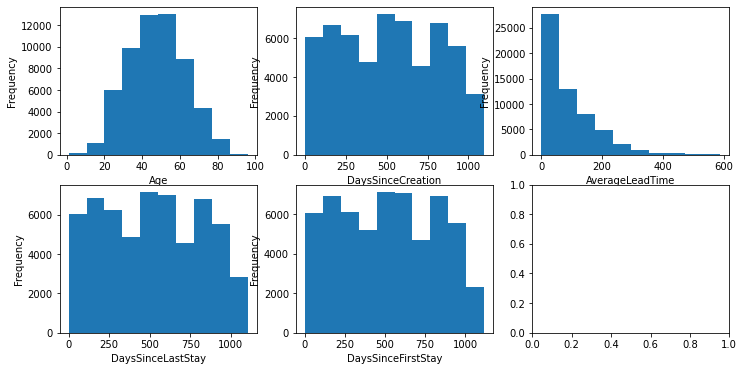

In [ ]:
# Histograms with frequency

columns = ['Age', 'DaysSinceCreation', 'AverageLeadTime', 'DaysSinceLastStay', 'DaysSinceFirstStay']

fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(12,6))
axs = axs.ravel()

for idx, column in enumerate(columns):
    hist, edges = np.histogram(df2[column], bins = 10)
    axs[idx].bar(edges[:-1], hist, width = np.diff(edges), align='edge')
    axs[idx].set_xlabel(column, size = 10)
    axs[idx].set_ylabel('Frequency', size = 10)
plt.show()

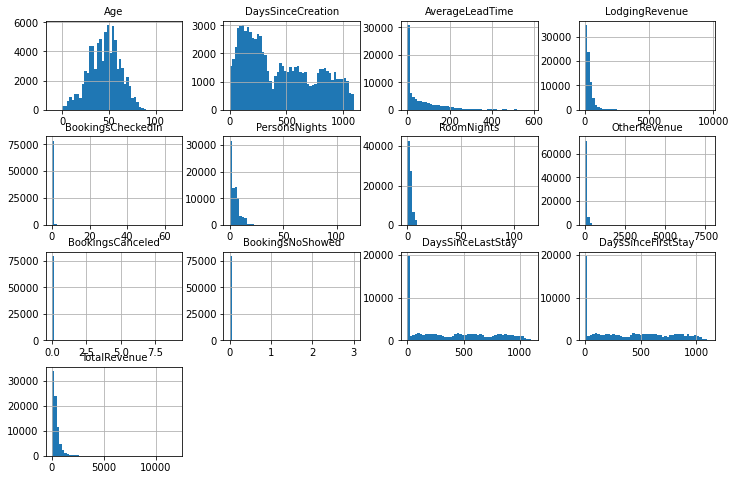

In [ ]:
# visualize numerical attributes
import matplotlib.pyplot as plt

plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=10)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

df1[num_cols].hist(bins=50, figsize=(12, 8))

plt.show()

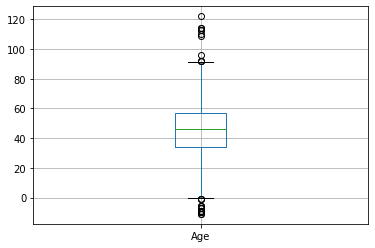

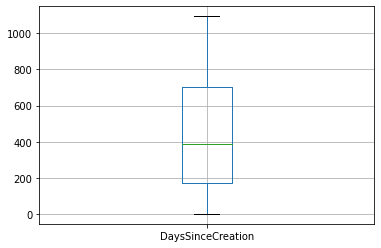

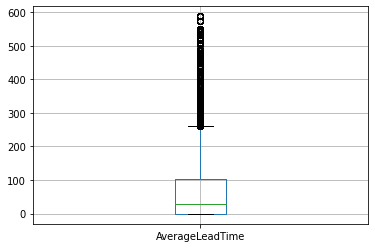

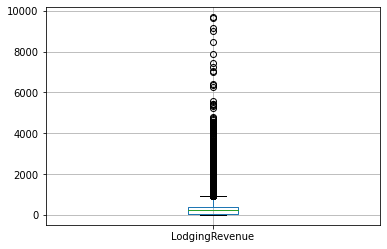

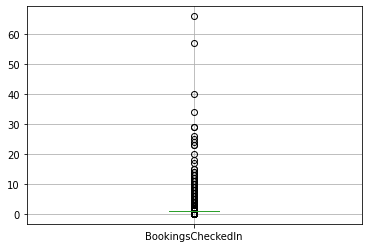

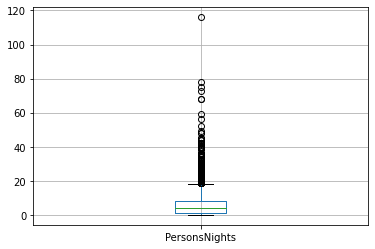

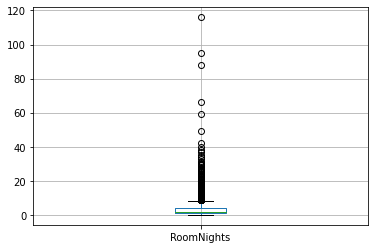

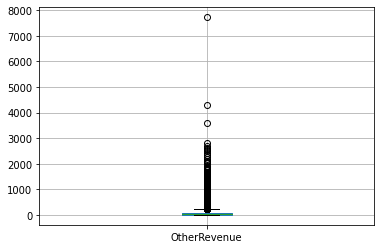

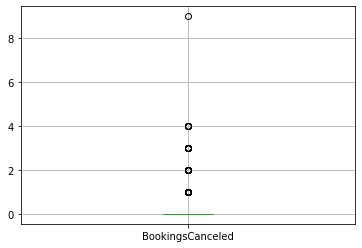

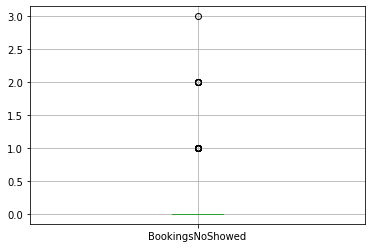

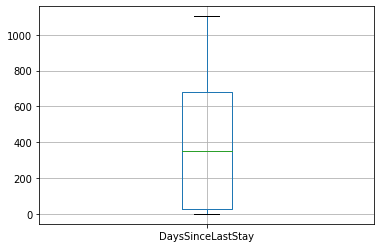

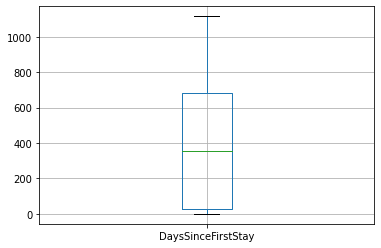

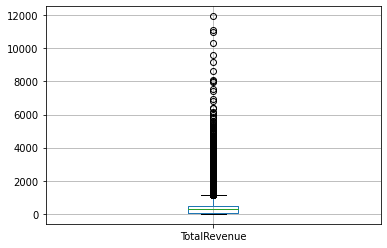

In [ ]:
# boxplots of numerical attributes

plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=10)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

# Iterate through the columns and create a boxplot for each one
for col in num_cols:
    plt.figure()
    df1[[col]].boxplot()

plt.show()

**Boxplots Interpretation**
- There are some negative values in Age column, which is not possible. We thus eliminate observations with negative ages.
- Similarly, observations with negative AverageLeadTime are removed
- Age, DaysSinceCreation, AverageLeadTime, DaysSinceLastStay, DaysSinceFirstStay have less skewness with relatively high symmeticity.
- This indicates they have less outliers (=extreme values) and this insight will be taken into account when implementing analysis.

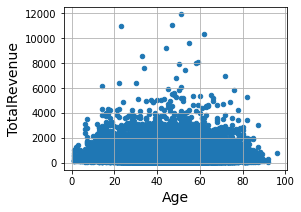

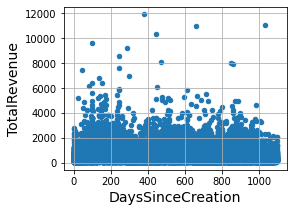

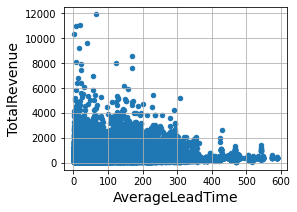

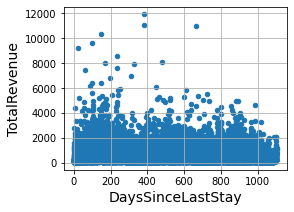

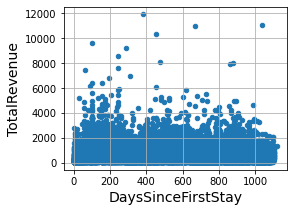

In [ ]:
for col in columns:
    df2.plot(kind="scatter", x=col, y='TotalRevenue', grid=True, figsize = (4, 3))
    plt.show()

## Data Profiling
- we can also save the profile report to html file using "profile.to_file(output_file = "Report.html")"

In [ ]:
from pandas_profiling import ProfileReport

In [ ]:
# profile = ProfileReport(df_raw, title="Profiling Report")

# # To retrieve the list of variables which are rejected due to high correlation
# rejected_variables = profile.get_rejected_variables()

# profile

In [ ]:
# # no rejected variables
# rejected_variables 

## Looking for Correlations

In [ ]:
corr_matrix = df2.corr()

In [ ]:
corr_matrix["TotalRevenue"].sort_values(ascending=False)

TotalRevenue            1.000000
LodgingRevenue          0.969305
OtherRevenue            0.656659
RoomNights              0.575012
PersonsNights           0.573264
BookingsCheckedIn       0.182127
ID                      0.100451
BookingsCanceled        0.068931
BookingsNoShowed        0.062654
SRQuietRoom             0.061755
AverageLeadTime         0.038475
SRHighFloor             0.031226
SRTwinBed               0.025910
SRCrib                  0.020325
SRKingSizeBed           0.019822
SRShower                0.015801
SRAwayFromElevator      0.012396
SRLowFloor              0.009407
SRBathtub               0.008579
SRMediumFloor           0.007174
SRNoAlcoholInMiniBar    0.005775
SRNearElevator          0.002718
SRAccessibleRoom       -0.003197
Age                    -0.036907
DaysSinceFirstStay     -0.099635
DaysSinceCreation      -0.102985
DaysSinceLastStay      -0.113431
Name: TotalRevenue, dtype: float64

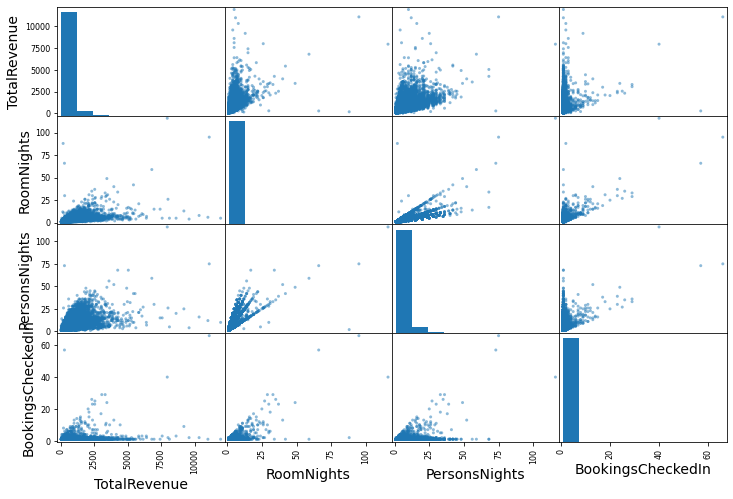

In [ ]:
# Scatterplots of top 4 correlation with the target variable
scatter_matrix(df2[['TotalRevenue', 'RoomNights', 'PersonsNights', 'BookingsCheckedIn']], figsize=(12, 8))
plt.show()

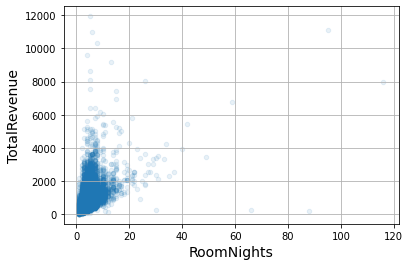

In [ ]:
df2.plot(kind="scatter", x="RoomNights", y="TotalRevenue", alpha=0.1, grid=True)
plt.show()

# Data Preparation (Prepare the Data for Machine Learning Algorithms)

## Dealing with missing data
- Missing value handling was already done in the previous steps. This is because it was necessary for data exploration process.
- We can see there is no missing value anymore


In [ ]:
df2.isnull().sum()

ID                      0
Nationality             0
Age                     0
DaysSinceCreation       0
NameHash                0
DocIDHash               0
AverageLeadTime         0
LodgingRevenue          0
OtherRevenue            0
BookingsCanceled        0
BookingsNoShowed        0
BookingsCheckedIn       0
PersonsNights           0
RoomNights              0
DaysSinceLastStay       0
DaysSinceFirstStay      0
DistributionChannel     0
MarketSegment           0
SRHighFloor             0
SRLowFloor              0
SRAccessibleRoom        0
SRMediumFloor           0
SRBathtub               0
SRShower                0
SRCrib                  0
SRKingSizeBed           0
SRTwinBed               0
SRNearElevator          0
SRAwayFromElevator      0
SRNoAlcoholInMiniBar    0
SRQuietRoom             0
TotalRevenue            0
dtype: int64

## Data Cleaning

- This part was also done in advance.
- Finished processes
  - observations with negative age values were removed
  - excluded observations with more than 100 ages
  - excluded observations with negative AverageLeadTime
  - Removed observations which have negative or 0 in 'PersonsNights' column
  - Removed observations with 'LodgingRevenue' = 0

## Outlier detection & treatment

In [ ]:
# Create an Isolation Forest object
isolation_forest = IsolationForest(random_state=42)

# Create an empty DataFrame to store the outlier predictions
outlier_preds = pd.DataFrame()

# Iterate all numerical columns
for col in num_cols:
    # Fit the Isolation Forest to the current column
    isolation_forest.fit(df2[[col]])
    
    # Get the outlier predictions for the current column
    outlier_pred = isolation_forest.predict(df2[[col]])
    
    # Add the outlier predictions as a new column in the outlier_preds DataFrame
    outlier_preds[col] = outlier_pred

**Drop Outliers and store the resulted dataframe in a new variable (df3)**

In [ ]:
# df3: dataframe without outliers
df3 = df2.iloc[outlier_pred == 1]

## Data preprocessing

### Handling Categorical Attributes
- Categorical variables will be dummified by using pd.get_dummies(), instead of OrdinalEncoder() because there are no ordinal relationship in the categorical values

## Feature Engineering

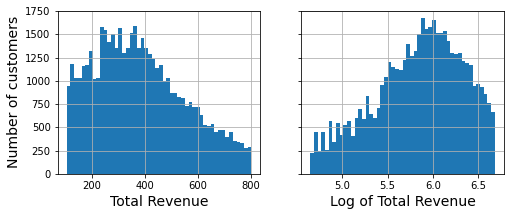

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(8, 3), sharey=True)

df3['TotalRevenue'].hist(ax=axs[0], bins=50)
df3['TotalRevenue'].apply(np.log).hist(ax=axs[1], bins=50)

axs[0].set_xlabel("Total Revenue")
axs[1].set_xlabel("Log of Total Revenue")
axs[0].set_ylabel("Number of customers")

plt.show()

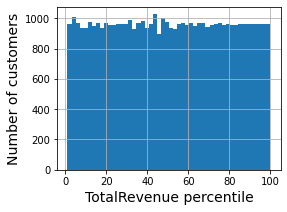

In [ ]:
percentiles = [np.percentile(df3['TotalRevenue'], p)
               for p in range(1, 100)]
flattened_TotalRevenue = pd.cut(df3['TotalRevenue'],
                                 bins=[-np.inf] + percentiles + [np.inf],
                                 labels=range(1, 100 + 1))
flattened_TotalRevenue.hist(bins=50, figsize=(4, 3))

plt.xlabel("TotalRevenue percentile")
plt.ylabel("Number of customers")
plt.show()

### What if we replace each value with its percentile?
- The plot below shows how the similarity changes depending on the value of gamma
- gamma is a parameter of the radial basis function (RBF) kernel, which is used to compute the similarity between input samples. It controls the width of the radial basis function, and therefore the smoothness of the resulting similarity function.
- In this case, two different values of gamma (0.1 and 0.03) are used to create two different similarity functions.
- The first one, with gamma=0.1, is less smooth than the second one, with gamma=0.03. 
- The resulting plots are then shown on the same chart, with the histogram of the age variable on the left y-axis and the similarity function on the right y-axis. The x-axis represents the age variable.

In [ ]:
from sklearn.metrics.pairwise import rbf_kernel

age_simil_35 = rbf_kernel(df3[['Age']], [[35]], gamma=0.1)

In [ ]:
# ages = np.linspace(df3[['Age']].min(),
#                    df3[['Age']].max(),
#                    500).reshape(-1, 1)
# gamma1 = 0.1
# gamma2 = 0.03
# rbf1 = rbf_kernel(ages, [[35]], gamma=gamma1)
# rbf2 = rbf_kernel(ages, [[35]], gamma=gamma2)

# fig, ax1 = plt.subplots()

# ax1.set_xlabel("Age")
# ax1.set_ylabel("Number of customers")
# ax1.hist(df3[['Age']], bins=50)

# ax2 = ax1.twinx()  # create a twin axis that shares the same x-axis
# color = "blue"
# ax2.plot(ages, rbf1, color=color, label="gamma = 0.10")
# ax2.plot(ages, rbf2, color=color, label="gamma = 0.03", linestyle="--")
# ax2.tick_params(axis='y', labelcolor=color)
# ax2.set_ylabel("Age similarity", color=color)

# plt.legend(loc="upper left")
# plt.show()

**Addtional synthesized attributes are included**

In [ ]:
# Create new attribute 'average_lead_time_per_age' by dividing the average lead time by the age
df3['average_lead_time_per_age'] = df3['AverageLeadTime'] / df3['Age']

# Create new attribute 'lodging_revenue_ratio' by dividing the lodging revenue by the total revenue
df3['lodging_revenue_ratio'] = df3['LodgingRevenue'] / df3['TotalRevenue']

# Create new attribute 'room_nights_per_person_night' by dividing the room nights by the number of persons nights
df3['room_nights_per_person_night'] = df3['RoomNights'] / df3['PersonsNights']

# Create new attribute 'average_stay_duration' by subtracting the days since first stay from days since last stay
df3['average_stay_duration'] = df3['DaysSinceLastStay'] - df3['DaysSinceFirstStay']

# Create new attribute 'average_lead_time_per_room_night' by dividing the average lead time by the room nights
df3['average_lead_time_per_room_night'] = df3['AverageLeadTime'] / df3['RoomNights']

# Create new attribute 'other_revenue_ratio' by dividing the other revenue by the total revenue
df3['other_revenue_ratio'] = df3['OtherRevenue'] / df3['TotalRevenue']

# Create new attribute 'canceled_bookings_ratio' by dividing the canceled bookings by the total bookings
df3['canceled_bookings_ratio'] = df3['BookingsCanceled'] / (df3['BookingsCanceled'] + df3['BookingsCheckedIn'] + df3['BookingsNoShowed'])

# Create new attribute 'market_segment_age_ratio' by dividing the age by the number of unique values in MarketSegment
df3['market_segment_age_ratio'] = df3['Age'] / len(df3['MarketSegment'].unique())

# Create new attribute 'days_since_creation_squared' by squaring the days since creation
df3['days_since_creation_squared'] = df3['DaysSinceCreation'] ** 2

# Create new attribute 'log_lodging_revenue' by taking the logarithm of the lodging revenue
df3['log_lodging_revenue'] = np.log(df3['LodgingRevenue'])

In [ ]:
# Synthesized columns
syn_cols = list(df3.columns[-10:])

## Splitting Train & Test sets
- To ensure that this notebook's outputs remain the same every time we run it, we need to set the random seed

In [ ]:
np.random.seed(42)

In [ ]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(df3, test_size=0.2, random_state=42)

# check if the total number of observations are equal to the sum of train&test sets lengths
len(df3) == len(train_set) + len(test_set)

True

## Feature Scaling

In [ ]:
print("Numerical attributes of the dataset (including synthesized attributes):", num_cols + syn_cols)

Numerical attributes of the dataset (including synthesized attributes): ['Age', 'DaysSinceCreation', 'AverageLeadTime', 'LodgingRevenue', 'BookingsCheckedIn', 'PersonsNights', 'RoomNights', 'OtherRevenue', 'BookingsCanceled', 'BookingsNoShowed', 'DaysSinceLastStay', 'DaysSinceFirstStay', 'TotalRevenue', 'average_lead_time_per_age', 'lodging_revenue_ratio', 'room_nights_per_person_night', 'average_stay_duration', 'average_lead_time_per_room_night', 'other_revenue_ratio', 'canceled_bookings_ratio', 'market_segment_age_ratio', 'days_since_creation_squared', 'log_lodging_revenue']


In [ ]:
stand_cols = num_cols + syn_cols

# exclude the target variable from the scaling stage
stand_cols.remove('TotalRevenue')

In [ ]:
min_max_scaler = MinMaxScaler(feature_range=(-1, 1))

X_train_minmax = min_max_scaler.fit_transform(train_set[stand_cols])
X_train_minmax = pd.DataFrame(X_train_minmax, columns = stand_cols)

X_test_minmax = min_max_scaler.transform(test_set[stand_cols])
X_test_minmax = pd.DataFrame(X_test_minmax, columns = stand_cols)

In [ ]:
# exclude attributes highly correlated with the target variable
input_cols = [e for e in X_train_minmax.columns if e not in ['LodgingRevenue', 'OtherRevenue', 
                                                             'lodging_revenue_ratio','other_revenue_ratio', 
                                                             'log_lodging_revenue']]

df_train = pd.get_dummies(pd.concat([X_train_minmax[input_cols], train_set[cate_cols].reset_index()], 
                                    axis = 1))

# include the columns containing "SR": already dummified
df_train = pd.concat([df_train, train_set[dum_cols].reset_index()], axis = 1)

df_train = df_train.drop('index', axis = 1)

In [ ]:
# exclude attributes highly correlated with the target variable
input_cols = [e for e in X_train_minmax.columns if e not in ['LodgingRevenue', 'OtherRevenue', 
                                                             'lodging_revenue_ratio','other_revenue_ratio', 
                                                             'log_lodging_revenue']]

df_test = pd.get_dummies(pd.concat([X_test_minmax[input_cols], test_set[cate_cols].reset_index()], axis = 1))

# include the columns containing "SR": already dummified
df_test = pd.concat([df_test, test_set[dum_cols].reset_index()], axis = 1)

df_test = df_test.drop('index', axis = 1)

In [ ]:
# define the target variable
y_train = train_set['TotalRevenue']
y_test = test_set['TotalRevenue']

# Modeling (Select and Train a Model)

• Train many quick and dirty models from different categories (e.g., linear, naive Bayes, SVM, Random Forests, neural net, etc.) using standard parameters.
• Measure and compare performance:
• For each model, use N-fold cross-validation and compute the mean and standard deviation of the performance measure on the N folds.
• Analyze the most significant variables for each algorithm.
• Analyze the types of errors the models make.
• What data would a human have used to avoid these errors?
• Have a quick round of feature selection and engineering.
• Have one or two more quick iterations of the five previous steps.
• Short-list the top three to five most promising models, preferring models that make different types of errors

## Model Selection and Evaluation

### Model Evaluation Using Cross-Validation

In [ ]:
# # define the models to test
# models = {
#     'LinearRegression' : LinearRegression(),
#     'RandomForest': RandomForestRegressor(),
#     'Lasso': Lasso(alpha=0.1),
#     'Ridge': Ridge(alpha=0.1),
#     'GradientBoosting': GradientBoostingRegressor(),
#     'DecisionTree': DecisionTreeRegressor()
# }

# # define the number of folds for cross-validation
# n_folds = 5

# # define the performance metric
# metric = 'accuracy'

# # initialize a dictionary to store the results
# results = {}

# # use k-fold cross-validation to evaluate each model

# kf = KFold(n_splits = n_folds)

# for name, model in models.items():
#     cv_scores = []
#     cv_scores_r2 = []
#     cv_scores_rmse = []
    
#     for train_index, test_index in kf.split(df_train):
        
#         X_cv_train, X_cv_test = df_train.iloc[train_index], df_train.iloc[test_index]
#         y_cv_train, y_cv_test = y_train.iloc[train_index], y_train.iloc[test_index]
        
#         model.fit(X_cv_train, y_cv_train)
        
#         y_pred = model.predict(X_cv_test)

#         cv_scores.append(mean_absolute_error(y_cv_test, y_pred))
#         cv_scores_r2.append(r2_score(y_cv_test, y_pred))
#         cv_scores_rmse.append(np.sqrt(mean_squared_error(y_cv_test, y_pred)))
        
#     # compute performance measures    
#     mean_score = np.mean(cv_scores)
#     std_score = np.std(cv_scores)
#     mean_score_r2 = np.mean(cv_scores_r2)
#     std_score_r2 = np.std(cv_scores_r2)
#     mean_score_rmse = np.mean(cv_scores_rmse)
#     std_score_rmse = np.std(cv_scores_rmse)
#     results[name] = (mean_score, std_score, mean_score_r2, std_score_r2, mean_score_rmse, std_score_rmse)

# # print the results
# for name, (mean_score, std_score, mean_score_r2, std_score_r2, mean_score_rmse, std_score_rmse) in results.items():
#     print(f'{name}: MAE={mean_score:.4f} ({std_score:.4f}), R2={mean_score_r2:.4f} ({std_score_r2:.4f}), RMSE={mean_score_rmse:.4f} ({std_score_rmse:.4f})')

## Model Fine-Tuning

### Grid Search

In [ ]:
# # define the models to test
# models = {
#     'LinearRegression' : LinearRegression(),
#     'RandomForest': RandomForestRegressor(),
#     'Lasso': Lasso(alpha=0.1),
#     'Ridge': Ridge(alpha=0.1),
#     'GradientBoosting': GradientBoostingRegressor(),
#     'DecisionTree': DecisionTreeRegressor()
# }

# param_grid = {
#     'LinearRegression': {'fit_intercept': [True, False]},
#     'RandomForest': {'n_estimators': [50, 100, 200], 'max_depth': [5, 10, 15]},
#     'Lasso': {'alpha': [0.1, 0.5, 1.0]},
#     'Ridge': {'alpha': [0.1, 0.5, 1.0]},
#     'GradientBoosting': {'n_estimators': [50, 100, 200], 'learning_rate': [0.1, 0.5, 1.0]},
#     'DecisionTree': {'max_depth': [5, 10, 15]}
# }

# # initialize a dictionary to store the results
# results = {}

# # use k-fold cross-validation to evaluate each model
# kf = KFold(n_splits = n_folds)

# for name, model in models.items():
#     grid_search = GridSearchCV(model, param_grid[name], cv=kf, scoring=['neg_mean_absolute_error', 'neg_mean_squared_error', 'r2'], refit='r2')
#     grid_search.fit(df_train, y_train)
#     results[name] = grid_search

# # print the results
# for name, grid_search_object in results.items():
#     print(f'Best parameters for {name} : {grid_search_object.best_params_}')

## Randomized Search

In [ ]:
# models = {
#     'LinearRegression' : LinearRegression(),
#     'RandomForest': RandomForestRegressor(),
#     'Lasso': Lasso(alpha=0.1),
#     'Ridge': Ridge(alpha=0.1),
#     'GradientBoosting': GradientBoostingRegressor(),
#     'DecisionTree': DecisionTreeRegressor()
# }

# param_grid = {
#     'LinearRegression': {'fit_intercept': [True, False]},
#     'RandomForest': {'n_estimators': [50, 100, 200], 'max_depth': [5, 10, 15]},
#     'Lasso': {'alpha': [0.1, 0.5, 1.0]},
#     'Ridge': {'alpha': [0.1, 0.5, 1.0]},
#     'GradientBoosting': {'n_estimators': [50, 100, 200], 'learning_rate': [0.1, 0.5, 1.0]},
#     'DecisionTree': {'max_depth': [5, 10, 15]}
# }

# # initialize a dictionary to store the results

# results = {}

# # use k-fold cross-validation to evaluate each model

# kf = KFold(n_splits = n_folds)

# for name, model in models.items():
#     randomized_search = RandomizedSearchCV(model, param_grid[name], cv=kf, 
#                                            scoring=['neg_mean_absolute_error', 'neg_mean_squared_error', 'r2'], refit='r2')
#     randomized_search.fit(df_train, y_train)
#     results[name] = randomized_search

# # print the results
# for name, randomized_search_object in results.items():
#     print(f'Best parameters for {name} : {randomized_search_object.best_params_}')

## Analyze the Best Models and Their Errors

**Among 5 regression models experimented, RandomForest was the best cosidering R2, RMSE, and MAE**

1. RandomForest
    - MAE=63.1024 (0.3031)
    - R2=0.7108 (0.0045)
    - RMSE=91.9726 (0.4991)
2. GradientBoosting
    - MAE=73.2443 (0.5383)
    - R2=0.6609 (0.0061)
    - RMSE=99.5940 (0.9723)
3. Lasso
    - MAE=87.0505 (0.4582)
    - R2=0.5447 (0.0267)
    - RMSE=115.3574 (3.3527)
4. Ridge
    - MAE=86.5954 (0.3813)
    - R2=0.5250 (0.0686)
    - RMSE=117.5999 (8.2006)
5. DecisionTree
    - MAE=81.3861 (0.9520)
    - R2=0.4708 (0.0202)
    - RMSE=124.3845 (1.9178)
    
**Based on the GridSearch result, we know the best parameters for RandomForest is {'max_depth': 15, 'n_estimators': 200} among the parameters included in the GridSearch process**

**Therefore, evaluating the test set will be done using the best hyperparameters with RandomForestRegressor**

## Evaluate Your System on the Test Set

In [ ]:
# rf = RandomForestRegressor(random_state = 42)

# # define the number of folds for cross-validation
# n_folds = 5

# # define the performance metric
# metric = 'accuracy'

# # initialize a dictionary to store the results
# results = {}

# # use k-fold cross-validation to evaluate each model

# kf = KFold(n_splits = n_folds)

# rf.fit(df_train, y_train)

# y_pred = rf.predict(df_test)

# cv_scores.append(mean_absolute_error(y_test, y_pred))
# cv_scores_r2.append(r2_score(y_test, y_pred))
# cv_scores_rmse.append(np.sqrt(mean_squared_error(y_test, y_pred)))

# # compute performance measures    
# mean_score = np.mean(cv_scores)
# std_score = np.std(cv_scores)
# mean_score_r2 = np.mean(cv_scores_r2)
# std_score_r2 = np.std(cv_scores_r2)
# mean_score_rmse = np.mean(cv_scores_rmse)
# std_score_rmse = np.std(cv_scores_rmse)
# results[name] = (mean_score, std_score, mean_score_r2, std_score_r2, mean_score_rmse, std_score_rmse)

# # print the results
# print(f'{name}: MAE={mean_score:.4f} ({std_score:.4f}), R2={mean_score_r2:.4f} ({std_score_r2:.4f}), RMSE={mean_score_rmse:.4f} ({std_score_rmse:.4f})')

We can compute a 95% confidence interval for the test RMSE:

In [ ]:
# confidence = 0.95
# squared_errors = (y_pred - y_test) ** 2
# np.sqrt(stats.t.interval(confidence, len(squared_errors) - 1,
#                          loc=squared_errors.mean(),
#                          scale=stats.sem(squared_errors)))

We could compute the interval manually like this:

In [ ]:
# m = len(squared_errors)
# mean = squared_errors.mean()
# tscore = stats.t.ppf((1 + confidence) / 2, df=m - 1)
# tmargin = tscore * squared_errors.std(ddof=1) / np.sqrt(m)
# np.sqrt(mean - tmargin), np.sqrt(mean + tmargin)

Alternatively, we could use a z-score rather than a t-score. Since the test set is not too small, it won't make a big difference:

In [ ]:
# zscore = stats.norm.ppf((1 + confidence) / 2)
# zmargin = zscore * squared_errors.std(ddof=1) / np.sqrt(m)
# np.sqrt(mean - zmargin), np.sqrt(mean + zmargin)

**To explore more, we can get feature importance and employ attributes based on the importance**

In [ ]:
# # fit the model
# rf = RandomForestRegressor(random_state = 42)
# rf.fit(df_train, y_train)

# # get feature importances
# importances = rf.feature_importances_

# # create feature importance table
# importance_table = pd.DataFrame({'feature': df_train.columns, 'importance': importances})
# importance_table.sort_values(by='importance', ascending=False, inplace=True)

In [ ]:
# import_cols = list(importance_table['feature'][:5])

**For example, the model below includes top 5 important attributes**

In [ ]:
# # define the number of folds for cross-validation
# n_folds = 5

# # define the performance metric
# metric = 'accuracy'

# # initialize a dictionary to store the results
# results = {}

# # use k-fold cross-validation to evaluate each model

# kf = KFold(n_splits = n_folds)

# rf.fit(df_train[import_cols], y_train)

# y_pred = rf.predict(df_test[import_cols])

# cv_scores.append(mean_absolute_error(y_test, y_pred))
# cv_scores_r2.append(r2_score(y_test, y_pred))
# cv_scores_rmse.append(np.sqrt(mean_squared_error(y_test, y_pred)))

# # compute performance measures    
# mean_score = np.mean(cv_scores)
# std_score = np.std(cv_scores)
# mean_score_r2 = np.mean(cv_scores_r2)
# std_score_r2 = np.std(cv_scores_r2)
# mean_score_rmse = np.mean(cv_scores_rmse)
# std_score_rmse = np.std(cv_scores_rmse)
# results[name] = (mean_score, std_score, mean_score_r2, std_score_r2, mean_score_rmse, std_score_rmse)

# # print the results
# print(f'{name}: MAE={mean_score:.4f} ({std_score:.4f}), R2={mean_score_r2:.4f} ({std_score_r2:.4f}), RMSE={mean_score_rmse:.4f} ({std_score_rmse:.4f})')

**We can notice the overall accuracy and evaluation scores are enhanced**

# Assignement 2: CausalML
- Goal: Compare if a customer stays on the high floor affect the total revenue.

## Importing libraries

In [ ]:
!pip install tensorflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install causalml

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from copy import deepcopy

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.linear_model import LogisticRegressionCV, LogisticRegression
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error as mse
from scipy.stats import entropy
import warnings

from causalml.inference.meta import LRSRegressor
from causalml.inference.meta import XGBTRegressor, MLPTRegressor
from causalml.inference.meta import BaseXRegressor, BaseRRegressor, BaseSRegressor, BaseTRegressor
from causalml.inference.meta.utils import (
    check_treatment_vector,
    check_p_conditions,
    convert_pd_to_np,
)
from causalml.inference.tf import DragonNet
from causalml.match import NearestNeighborMatch, MatchOptimizer, create_table_one
from causalml.propensity import ElasticNetPropensityModel
from causalml.dataset.regression import *
from causalml.metrics import *

import os, sys

%matplotlib inline

warnings.filterwarnings('ignore')
plt.style.use('fivethirtyeight')
sns.set_palette('Paired')
plt.rcParams['figure.figsize'] = (12,8)

ERROR:duecredit:Failed to import duecredit due to No module named 'duecredit'


## Load your dataset into a pandas DataFrame (df)

In [ ]:
df = df3.copy() # copy df used for the assignment 1

## Oversampling
- Since the proportion of both groups is significantly different, I oversampled treatment_group

In [ ]:
treatment_group = df[df['SRHighFloor'] == 1]
control_group = df[df['SRHighFloor'] == 0]

treatment_group_over = treatment_group.sample(len(control_group), 
                                              replace = True, random_state = 0)

df_bal = pd.concat([treatment_group_over, control_group], axis = 0)

df_bal

,ID,Nationality,Age,DaysSinceCreation,NameHash,DocIDHash,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,...,average_lead_time_per_age,lodging_revenue_ratio,room_nights_per_person_night,average_stay_duration,average_lead_time_per_room_night,other_revenue_ratio,canceled_bookings_ratio,market_segment_age_ratio,days_since_creation_squared,log_lodging_revenue
56064,56065,ESP,55.0,230,0x1EFA866F649FC6B7E2767357E3110B72D83E2FD4E035...,0x0137DAE636E0316717338206A2A2C3832208FB7E6C30...,40,220.36,28.0,0,...,0.727273,0.887260,0.500000,0,20.000000,0.112740,0.0,7.857143,52900,5.395263
27647,27648,DEU,58.0,603,0xC06D04E98ECC35A086F86F07BACAA849CF269037A5FF...,0xF233003E33D4DAB93AA461AA002BD5F16420237EA8F2...,50,268.20,34.0,0,...,0.862069,0.887492,0.500000,0,25.000000,0.112508,0.0,8.285714,363609,5.591733
25598,25599,DEU,24.0,634,0x73B103BA07AC027CF971305E8F80C0CCA781C9761D3A...,0xD16389771FA744DCDCEC61088F81719EF124BDA8B0C9...,91,642.00,92.5,0,...,3.791667,0.874064,0.333333,0,22.750000,0.125936,0.0,3.428571,401956,6.464588
59784,59785,CHN,25.0,200,0x0A5B1323A03C3605C088307AF445EDB84D481D27B6D4...,0x0814C69C0A21FFDFC9B26C9908BD1F35492FEEDAA208...,105,278.10,28.0,0,...,4.200000,0.908527,0.500000,0,52.500000,0.091473,0.0,3.571429,40000,5.627981
32804,32805,DEU,48.0,530,0xF2AD67184A6BD15B449E7EEB4874DBD97ED117A4BC1D...,0xA4FC22F42FF08B4E5EE4EEA78086C05A921A4E81FDD5...,330,314.10,273.5,0,...,6.875000,0.534547,0.333333,0,110.000000,0.465453,0.0,6.857143,280900,5.749711
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83577,83578,PRT,41.0,0,0x445EC0600025112A877986E6C2FCE2421AAB08578385...,0xF64E6D2C52B1B1336C0D0C56622FC61D075B825CE203...,3,180.00,68.0,0,...,0.073171,0.725806,0.333333,0,1.500000,0.274194,0.0,5.857143,0,5.192957
83580,83581,DEU,48.0,0,0x98FF1A89EAFB3D2A757C073C0FB89647DD33EDB97B8D...,0x9A75BA8B885B4CCF562FEC991F4B34DDECE67D43DD04...,20,176.00,147.0,0,...,0.416667,0.544892,0.500000,0,10.000000,0.455108,0.0,6.857143,0,5.170484
83582,83583,FRA,49.0,0,0x92C604CF82CF16CB1BD33732B537F86D007B7BC48C8C...,0x5672F95F21E93CDF0387BC40900503CA91352EA17B84...,91,143.00,2.0,0,...,1.857143,0.986207,0.500000,0,91.000000,0.013793,0.0,7.000000,0,4.962845
83584,83585,ITA,52.0,0,0xC93C23F50B11F71BD77EC36202B9D42AB0BAA8E77F9F...,0x7AE14552CC1ABDB74EED8F709E9ECDDA822F164C704F...,116,336.90,105.5,0,...,2.230769,0.761528,0.500000,0,29.000000,0.238472,0.0,7.428571,0,5.819786


## Target, control, treatment (common)
- Once you selected your dataset, identify
    - Target
    - Control features
    - Treatment features
    - https://github.com/uber/causalml/blob/master/examples/dragonnet_example.ipynb to see how these features been identified


- Target: the outcome variable that we are trying to predict or explain (i.e., "treatment effect")
- Control features: also known as confounding variables, are variables that may confound the relationship between the treatment and the outcome. In causal ML, these variables are used to **control for any extraneous factors that could affect the target,** so that we can better understand the true causal effect of the treatment.
- Treatment features: variables that indicate the presence or absence of a treatment. In causal ML, these variables are used to define the treatment group, which is the group of individuals who received the treatment, and the control group, which is the group of individuals who did not receive the treatment.

In [ ]:
# Treatment variable
df_bal['SRHighFloor'].value_counts(normalize = True)

1    0.5
0    0.5
Name: SRHighFloor, dtype: float64

In [ ]:
treatment = df_bal['SRHighFloor']

In [ ]:
# Outcome name
y = df_bal['TotalRevenue']

In [ ]:
# Predictors
causal_preds = ['Age',
 'DaysSinceCreation',
 'AverageLeadTime',
 'BookingsCheckedIn',
 'PersonsNights',
 'RoomNights',
 'BookingsCanceled',
 'BookingsNoShowed',
 'DaysSinceLastStay',
 'DaysSinceFirstStay']

In [ ]:
# Define the predictors
X = df_bal[causal_preds]

In [ ]:
df_bal['SRHighFloor'].value_counts()

1    45869
0    45869
Name: SRHighFloor, dtype: int64

## LRSRegressor
- S-learner trains a single machine learning model, and that's why it's called s-learner

In [ ]:
df = df_bal.copy()

In [ ]:
# Define a function that will label for treatment
def treat(df):
    if df['SRHighFloor'] == 1:
        return 1
    return 0

df['Treatment'] = df.apply(lambda df: treat(df), axis=1)

# define treatment
treatment = df['Treatment']
treatment.value_counts()

1    45869
0    45869
Name: Treatment, dtype: int64

In [ ]:
df.Treatment = df.Treatment.replace({1:"treatment_A",0:"control"})
df.Treatment

56064    treatment_A
27647    treatment_A
25598    treatment_A
59784    treatment_A
32804    treatment_A
            ...     
83577        control
83580        control
83582        control
83584        control
83586        control
Name: Treatment, Length: 91738, dtype: object

In [ ]:
# w_multi
w_multi = df.Treatment

In [ ]:
# Feature name
feature_names = []
for col in causal_preds:
    feature_names.append(col)
feature_names

['Age',
 'DaysSinceCreation',
 'AverageLeadTime',
 'BookingsCheckedIn',
 'PersonsNights',
 'RoomNights',
 'BookingsCanceled',
 'BookingsNoShowed',
 'DaysSinceLastStay',
 'DaysSinceFirstStay']

In [ ]:
# Standardize predictors
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = pd.DataFrame(data = scaler.fit_transform(df[causal_preds]), 
                 columns = causal_preds)

### Experiments with LRSRegressor

#### S-learner with "Auto"

In [ ]:
# (+) SRMediumFloor, SRBathtub, SRCrib (Indication if the customer usually asks for a crib (0: No, 1: Yes))
# (-) SRNoAlcoholInMiniBar

# SLearner & Auto
# Ready-to-use S-Learner using LinearRegression
# Implementing S Learner 
base_algo = LGBMRegressor()

slearner = BaseSRegressor(base_algo, control_name='control')
slearner.estimate_ate(X, w_multi, y)

array([19.46620531])

In [ ]:
# Implementing Prediction based on model
slearner_tau = slearner.fit_predict(X, w_multi, y)

In [ ]:
slearner.get_importance(X=X, 
                        tau=slearner_tau,
                        normalize=True, 
                        method='auto', 
                        features=feature_names)

{'treatment_A': AverageLeadTime       0.242283
 RoomNights            0.196930
 Age                   0.159499
 DaysSinceCreation     0.136986
 PersonsNights         0.104122
 DaysSinceLastStay     0.103365
 DaysSinceFirstStay    0.032217
 BookingsCheckedIn     0.024597
 BookingsCanceled      0.000000
 BookingsNoShowed      0.000000
 dtype: float64}

#### Plot feature importance "Auto"

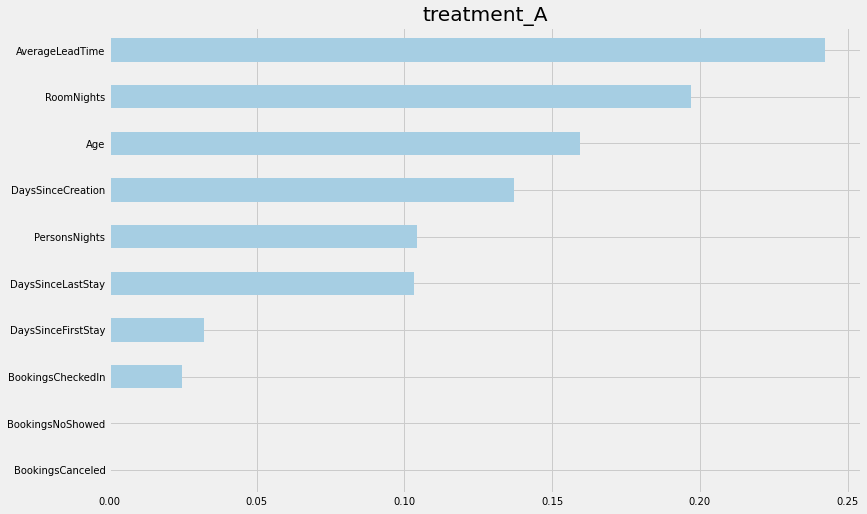

In [ ]:
# Auto feature importance
slearner.plot_importance(X=X,
                        tau=slearner_tau,
                        normalize = True,
                        method = 'auto',
                        features = feature_names)

#### S-learner with "Permutation"

In [ ]:
# Permutation method
slearner.get_importance(X=X, 
                        tau=slearner_tau, 
                        method='permutation', 
                        features=feature_names, 
                        random_state=42)

{'treatment_A': AverageLeadTime       0.681715
 RoomNights            0.580241
 Age                   0.445695
 DaysSinceCreation     0.299595
 PersonsNights         0.264572
 DaysSinceLastStay     0.194693
 DaysSinceFirstStay    0.096671
 BookingsCheckedIn     0.046597
 BookingsCanceled      0.000000
 BookingsNoShowed      0.000000
 dtype: float64}

#### Plot feature importance "Permutation"

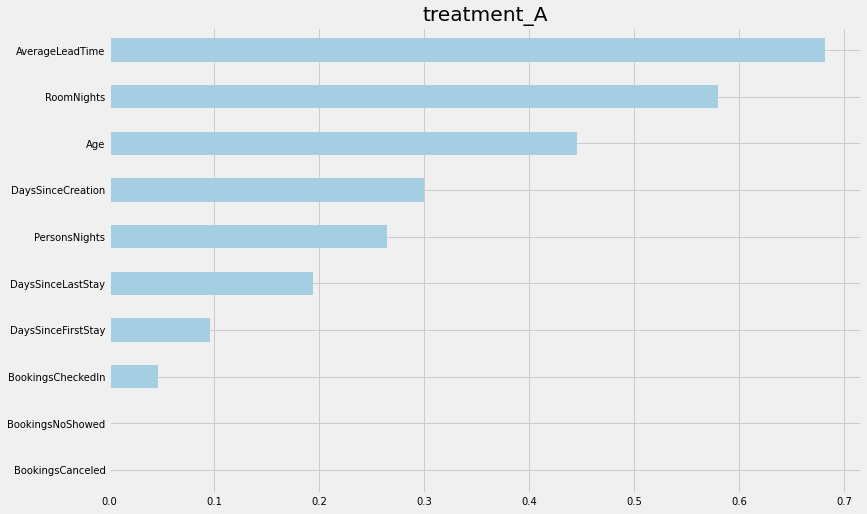

In [ ]:
slearner.plot_importance(X=X, 
                         tau=slearner_tau, 
                         method='permutation', 
                         features=feature_names, 
                         random_state=42)

#### Shap values of S-learner

In [ ]:
shap_slearner = slearner.get_shap_values(X=X, tau=slearner_tau)
shap_slearner

{'treatment_A': array([[ -0.64935481,   1.72274645,  -0.30003637, ...,   0.        ,
           1.19020664,   0.69690314],
        [  1.18960248,  -0.68684304,   0.47275537, ...,   0.        ,
           1.07313431,   0.54827504],
        [-11.72351017,  -1.24977738,   0.73974593, ...,   0.        ,
          -4.41147431,  -0.63282443],
        ...,
        [  1.20702968,  -0.2937135 ,  -2.3268891 , ...,   0.        ,
          -1.75958361,   0.6963407 ],
        [ -0.49374585,  -1.01930262,   1.16961782, ...,   0.        ,
          -0.65309614,   0.65592124],
        [ -0.30015557,   0.20405976,  -0.36739282, ...,   0.        ,
           0.33899626,   1.26597499]])}

In [ ]:
np.mean(np.abs(shap_slearner['treatment_A']),axis=0)


array([4.66143012, 3.50490163, 5.78317117, 0.59114405, 3.73825687,
       7.10226616, 0.        , 0.        , 2.46620706, 1.10355954])

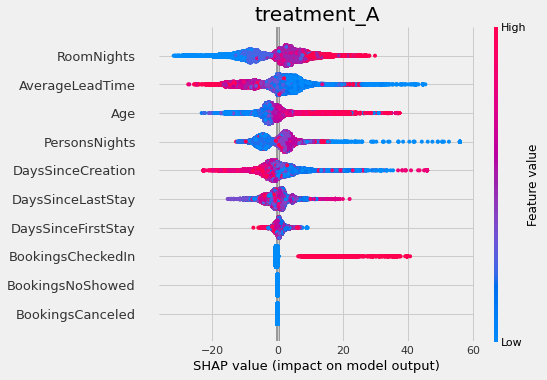

In [ ]:
# Plot shap values without specifying shap_dict
slearner.plot_shap_values(X=X, tau=slearner_tau, features=feature_names)

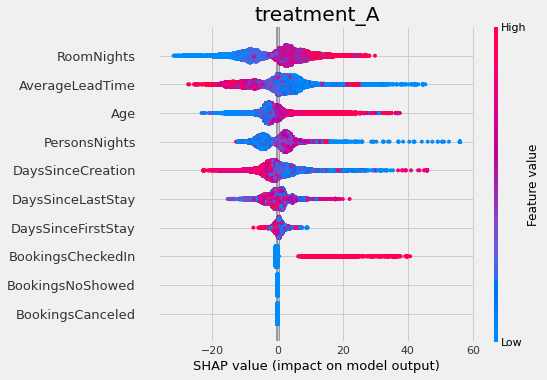

In [ ]:
# Plot shap values WITH specifying shap_dict
slearner.plot_shap_values(X=X, shap_dict=shap_slearner, features=feature_names)

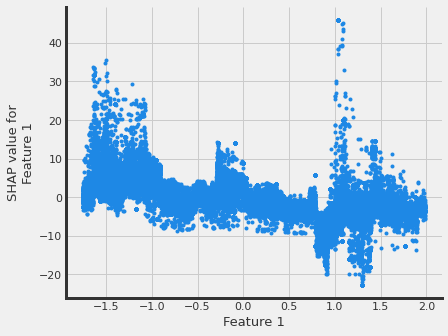

In [ ]:
# interaction_idx set to None (no color coding for interaction effects)
slearner.plot_shap_dependence(treatment_group='treatment_A',
                              feature_idx=1,
                              X=X,
                              tau=slearner_tau,
                              interaction_idx=None,
                              shap_dict=shap_slearner)

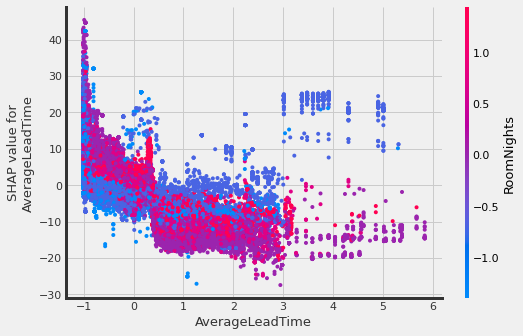

In [ ]:
# interaction_idx set to 'auto' (searches for feature with greatest approximate interaction)
# specify feature names
slearner.plot_shap_dependence(treatment_group='treatment_A',
                              feature_idx=2,
                              X=X,
                              tau=slearner_tau,
                              interaction_idx='auto',
                              shap_dict=shap_slearner,
                              features=feature_names)

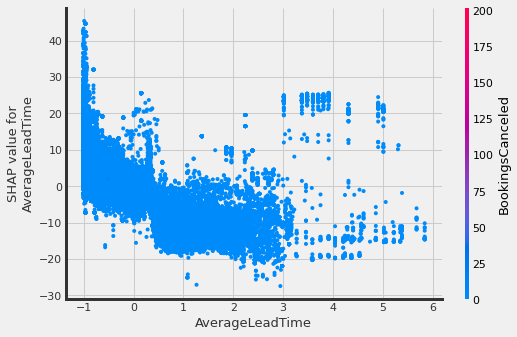

In [ ]:
# interaction_idx set to specific index
slearner.plot_shap_dependence(treatment_group='treatment_A',
                              feature_idx=2,
                              X=X,
                              tau=slearner_tau,
                              interaction_idx=6,
                              shap_dict=shap_slearner, 
                              features=feature_names)

## XGBTRegressor

### Experiments with XGBTRegressor

#### T-learner with "Auto"

In [ ]:
# T Learner
learner_t = BaseTRegressor(learner=XGBRegressor())
ate_t = learner_t.estimate_ate(X=X, treatment=treatment, y=y)
cate_t = learner_t.fit_predict(X=X, treatment=treatment, y=y)
print('Using the ready-to-use XGBTRegressor class')
print(ate_t)

[00:25:43] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[00:25:46] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[00:25:50] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[00:25:52] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Using the ready-to-use XGBTRegressor class
(array([22.55089963]), array([21.32350956]), array([23.7782897]))


In [ ]:
learner_t.get_importance(X=X, 
                        tau=cate_t,
                        normalize=True, 
                        method='auto', 
                        features=feature_names)

{1: PersonsNights         0.198484
 AverageLeadTime       0.171531
 Age                   0.144299
 DaysSinceCreation     0.140260
 DaysSinceLastStay     0.137618
 BookingsCheckedIn     0.093182
 RoomNights            0.070271
 DaysSinceFirstStay    0.044355
 BookingsCanceled      0.000000
 BookingsNoShowed      0.000000
 dtype: float64}

#### Plot feature importance "Auto"

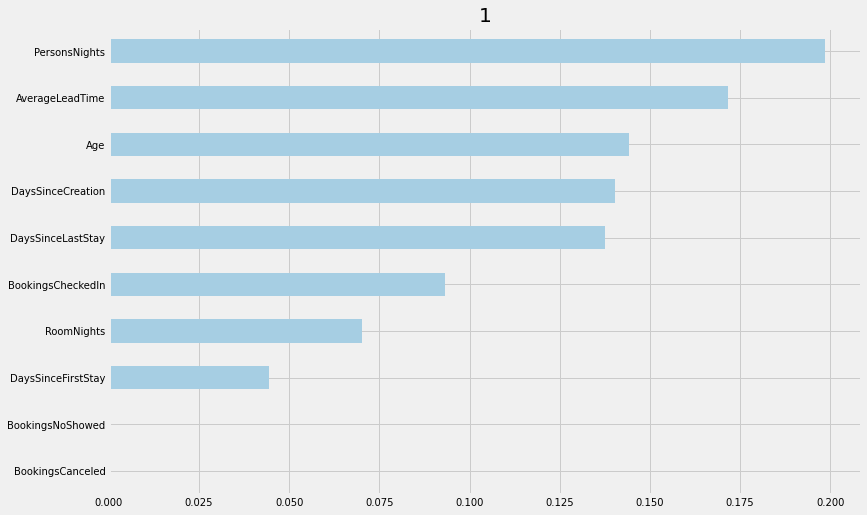

In [ ]:
learner_t.plot_importance(X=X, 
                         tau=cate_t, 
                         normalize=True, 
                         method='auto', 
                         features=feature_names)

#### T-learner with "Permutation"

In [ ]:
learner_t.get_importance(X=X, 
                        tau=cate_t,
                        normalize=True, 
                        method='permutation', 
                        features=feature_names)

{1: RoomNights            0.457161
 AverageLeadTime       0.448005
 PersonsNights         0.383028
 Age                   0.290237
 DaysSinceCreation     0.289738
 DaysSinceLastStay     0.256659
 BookingsCheckedIn     0.207191
 DaysSinceFirstStay    0.089476
 BookingsCanceled      0.000000
 BookingsNoShowed      0.000000
 dtype: float64}

#### Plot feature importance "Permutation"

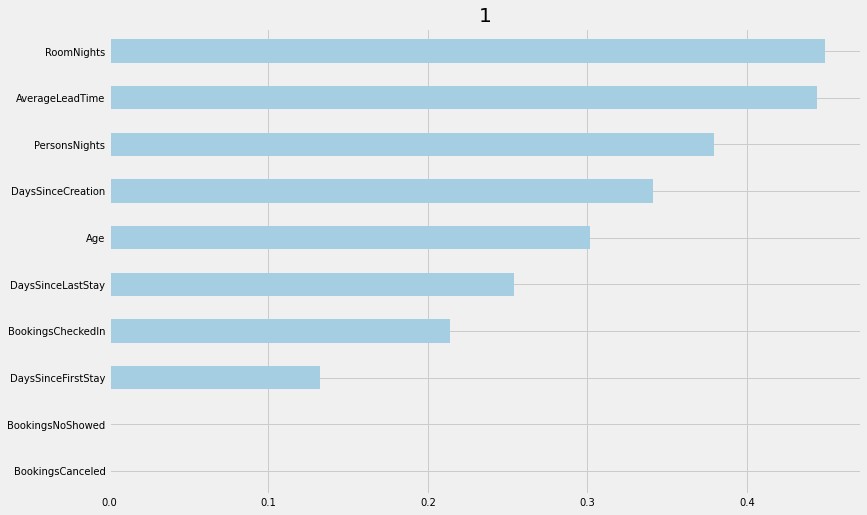

In [ ]:
learner_t.plot_importance(X=X, 
                         tau=cate_t, 
                         normalize=True, 
                         method='permutation', 
                         features=feature_names)

## Other methods tried

In [ ]:
# X Learner without propensity score input
learner_x = BaseXRegressor(XGBRegressor())
ate_x = learner_x.estimate_ate(X=X, treatment=treatment, y=y)
print('BaseXRegressor with XGB without propensity score:')
print(ate_x)

# Calling the Base Learner class and feeding in LinearRegression
learner_x = BaseXRegressor(learner=LinearRegression())
ate_x = learner_x.estimate_ate(X=X, treatment=treatment, y=y)
print('BaseXRegressor with Linear Regression without propensity score:')
print(ate_x)

[00:30:44] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[00:30:47] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[00:30:50] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[00:30:52] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
BaseXRegressor with XGB without propensity score:
(array([22.37069453]), array([21.14980281]), array([23.59158624]))
BaseXRegressor with Linear Regression without propensity score:
(array([20.56759691]), array([18.77880996]), array([22.35638385]))


In [ ]:
# R Learner without propensity score input

learner_r = BaseRRegressor(learner=XGBRegressor())
ate_r = learner_r.estimate_ate(X=X, treatment=treatment, y=y)
print('BaseRRegressor with XGB without propensity score:')
print(ate_r)

# Calling the Base Learner class and feeding in LinearRegression
learner_r = BaseRRegressor(learner=LinearRegression())
ate_r = learner_r.estimate_ate(X=X, treatment=treatment, y=y)
print('BaseRRegressor with Linear Regression without propensity score:')
print(ate_r)

[00:39:10] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
BaseRRegressor with XGB without propensity score:
(array([20.68232277]), array([20.67815475]), array([20.6864908]))
BaseRRegressor with Linear Regression without propensity score:
(array([2.24540558e+08]), array([2.24148909e+08]), array([2.24932206e+08]))


[00:43:30] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[00:43:32] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[00:47:50] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[00:47:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[00:47:56] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[00:47:59] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[00:52:22] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


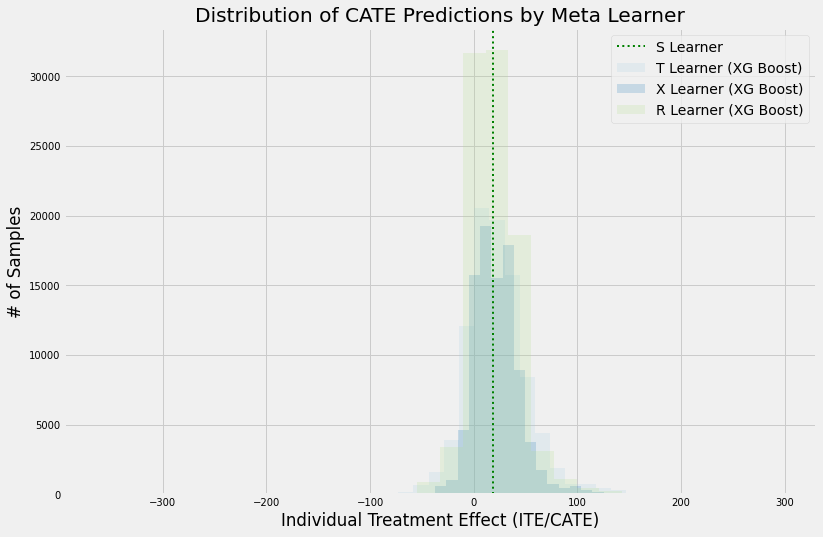

In [ ]:
# S Learner
learner_s = LRSRegressor()
cate_s = learner_s.fit_predict(X=X, treatment=treatment, y=y)

# T Learner
#learner_t = BaseTRegressor(learner=XGBRegressor())
learner_t = XGBTRegressor()
cate_t = learner_t.fit_predict(X=X, treatment=treatment, y=y)

# X Learner without propensity score input
learner_x_no_p = BaseXRegressor(learner=XGBRegressor())
cate_x_no_p = learner_x_no_p.fit_predict(X=X, treatment=treatment, y=y)

# R Learner without propensity score input
learner_r_no_p = BaseRRegressor(learner=XGBRegressor())
cate_r_no_p = learner_r_no_p.fit_predict(X=X, treatment=treatment, y=y)

alpha=0.2
bins=30

plt.figure(figsize=(12,8))
plt.hist(cate_t, alpha=alpha, bins=bins, label='T Learner (XG Boost)')
plt.hist(cate_x_no_p, alpha=alpha, bins=bins, label='X Learner (XG Boost)')
plt.hist(cate_r_no_p, alpha=alpha, bins=bins, label='R Learner (XG Boost)')

plt.axvline(x=cate_s[0] ,color="green", linestyle="dotted", label = "S Learner", linewidth=2)

plt.title('Distribution of CATE Predictions by Meta Learner')
plt.xlabel('Individual Treatment Effect (ITE/CATE)')
plt.ylabel('# of Samples')
_=plt.legend()

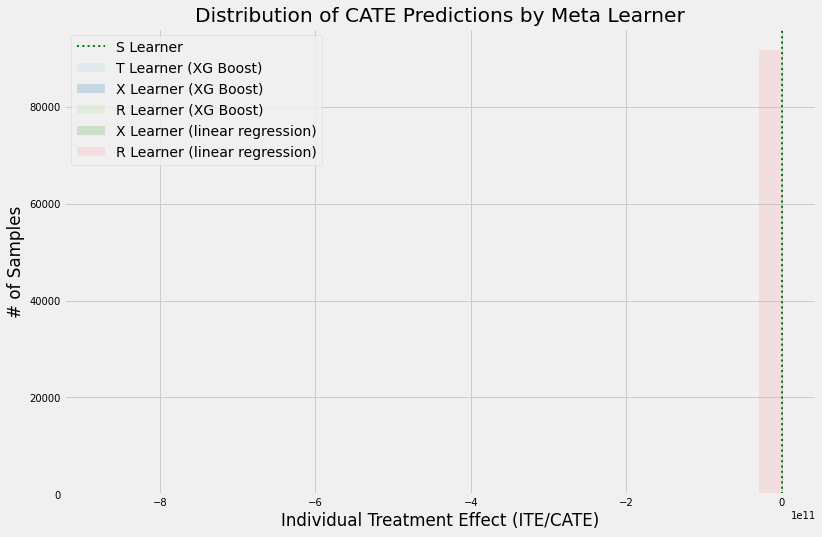

In [ ]:
# X Learner with Linear Regression without propensity score input
learner_x = BaseXRegressor(learner=LinearRegression())
cate_x = learner_x.fit_predict(X=X, treatment=treatment, y=y)

# R Learner with linear regression without propensity score input
learner_r = BaseRRegressor(learner=LinearRegression())
cate_r = learner_r.fit_predict(X=X, treatment=treatment, y=y)

alpha=0.2
bins=30
plt.figure(figsize=(12,8))
plt.hist(cate_t, alpha=alpha, bins=bins, label='T Learner (XG Boost)')
plt.hist(cate_x_no_p, alpha=alpha, bins=bins, label='X Learner (XG Boost)')
plt.hist(cate_r_no_p, alpha=alpha, bins=bins, label='R Learner (XG Boost)')

plt.hist(cate_x, alpha=alpha, bins=bins, label='X Learner (linear regression)')
plt.hist(cate_r, alpha=alpha, bins=bins, label='R Learner (linear regression)')

plt.axvline(x=cate_s[0] ,color="green", linestyle="dotted", label = "S Learner", linewidth=2)

plt.title('Distribution of CATE Predictions by Meta Learner')
plt.xlabel('Individual Treatment Effect (ITE/CATE)')
plt.ylabel('# of Samples')
_=plt.legend()

## Conclusion: Analysis and interpretation

**Hypothesis (alternative)**
- The location of a room on a high floor has a higher chance of producing a greater total revenue from clients.

**interpretation**
- It was discovered that the height of a room has a positive impact on TotalRevenue, beyond just a simple correlation.
- Detailed interpretation is shown below.

### Average treatment effect (ATE) using LRSRegressor and XGBTRegressor
- Upper bound and lower bound using the estimate_ate method.
- We can see that ATEs are 19.47, 22.55 each. This result shows that using the XGBTRegressor produced a much more accurate estimation for the average treatment effect.
- This indicates the average difference in the outcome variable between the treated group and the control group. 
- The ATE is calculated as the average difference between the outcomes of the treated group and the control group. 
- Since ATEs are positive, it means that the treatment had a positive effect on the outcome variable.
- In other words, rooms located at higher elevations (SRHightFloor = 1) are more likely to generate higher total revenue (TotalRevenue) from clients.


### Feature Importance using LRSRegressor: Auto and Permutation
- From the method='Purmutation' output, we can see that AverageLeadTime is the most importance feature, BookingsNoShowed is the least important feature, and RoomNights, Age, and DaysSinceCreation importance values are similar. This is consistent with the auto method results.
- We could also visualize the feature importance using the plot_importance function, which is shown in the previous steps.

- Feature Importance (LRSRegressor with "Auto")
    - AverageLeadTime       0.242283
    - RoomNights            0.196930
    - Age                   0.159499
    - DaysSinceCreation     0.136986
    - PersonsNights         0.104122
    - DaysSinceLastStay     0.103365
    - DaysSinceFirstStay    0.032217
    - BookingsCheckedIn     0.024597
    - BookingsCanceled      0.000000
    - BookingsNoShowed      0.000000
- Feature Importance (LRSRegressor with "Permutation")
    - AverageLeadTime       0.681715
    - RoomNights            0.580241
    - Age                   0.445695
    - DaysSinceCreation     0.299595
    - PersonsNights         0.264572
    - DaysSinceLastStay     0.194693
    - DaysSinceFirstStay    0.096671
    - BookingsCheckedIn     0.046597
    - BookingsCanceled      0.000000
    - BookingsNoShowed      0.000000

### S-learner model interpretation
- Interpretation is based on the s-learner model using SHAP (SHapley Additive exPlanations).
- The sharpley values are calculated based on a machine learning model, where the dependent variable is the individual treatment effect (ITE) and the independent variables are the features of the model.
- The SHAP plot includes both the feature importance and the feature impacts.
- The SHAP dependence plot shows the features’ marginal impact on model predictions.
- The SHAP plots of LRSRegressor indicate that AverageLeadTime is the most significant factor. Predictions are positively impacted by high values of AverageLeadTime and negatively impacted by low values of AverageLeadTime.

### Feature Importance using XGBTRegressor: Auto and Permutation
- From the method='Purmutation' output, we can see that RoomNights is the most importance feature, BookingsNoShowed is still the least important feature, and Age, DaysSinceCreation, and DaysSinceLastStay importance values are similar. This is consistent with the auto method results.
- However, the feature importance order for PersonsNights, AverageLeadTime and RoomNights are different. The auto method shows that Age is the third most important feature while the permutation method shows PersonsNights as the third most important feature.
- We could also visualize the feature importance using the plot_importance function, which is shown in the previous steps.

- Feature Importance (XGBTRegressor with "Auto")
    - PersonsNights         0.198484
    - AverageLeadTime       0.171531
    - Age                   0.144299
    - DaysSinceCreation     0.140260
    - DaysSinceLastStay     0.137618
    - BookingsCheckedIn     0.093182
    - RoomNights            0.070271
    - DaysSinceFirstStay    0.044355
    - BookingsCanceled      0.000000
    - BookingsNoShowed      0.000000
 
- Feature Importance (XGBTRegressor with "Permutation")
    - RoomNights            0.453731
    - AverageLeadTime       0.442574
    - PersonsNights         0.388097
    - Age                   0.282972
    - DaysSinceCreation     0.254744
    - DaysSinceLastStay     0.247888
    - BookingsCheckedIn     0.209367
    - DaysSinceFirstStay    0.090504
    - BookingsCanceled      0.000000
    - BookingsNoShowed      0.000000





